In [2]:
import numpy as np
import pandas as pd
from pylab import plt
%matplotlib inline

In [3]:
data = pd.read_csv('../js/results/Hardware_timestamp-samples1.csv')
mmn_timestamps = pd.read_csv('../js/results/Hardware_timestamp-stim1.csv')

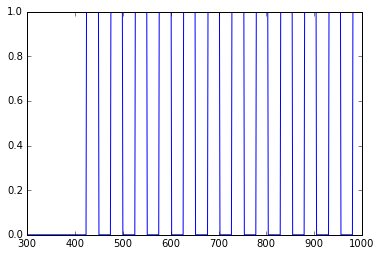

In [8]:
plt.plot(data['Digital Value'][300:1000])

In [14]:
X = []
window = 50
offset = 10
sfreq = 250.0
times = np.linspace(-offset/sfreq, window/sfreq, window + offset)
for i in mmn_timestamps.timestamp.values:
    ix = np.where(data['Time Stamp'] > i)[0]
    if len(ix)>0:
        ix = ix[0]
        X.append(data.loc[(ix - offset):(ix + window - 1), 'Digital Value'])
X = np.array(X[:-1], dtype=np.float64)

# baseline correction
X -= np.atleast_2d(X[:, 0:offset-5].mean(1)).T
# normalization
X /= np.atleast_2d(X.max(1)).T

Now each line below is a stimulus

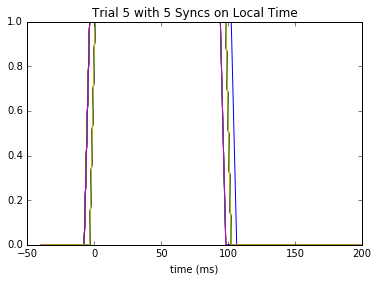

In [15]:
plt.plot(1000*times, X.T);
plt.title('Trial 5 with 5 Syncs on Local Time')
plt.xlabel('time (ms)')

We can also show it as a picture

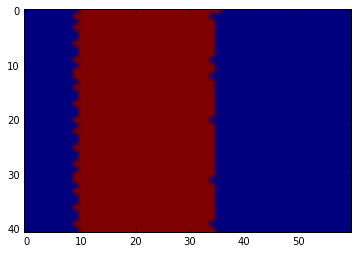

In [16]:
plt.imshow(X)

We can also quantify it, here we detect when the signal > 300 and plot the histogram

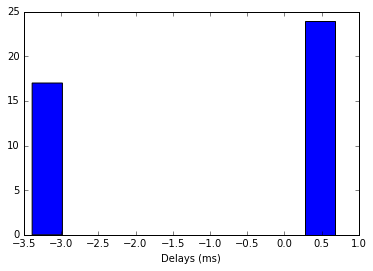

In [17]:
delays  = []
delays_off = []
for x in X:
    d = np.where(x>0.1)[0][0]
    delays.append(1000*times[d])
    d = np.where(x>0.9)[0][-1]
    delays_off.append(1000*times[d])
plt.hist(delays)
plt.xlabel('Delays (ms)')

to see the delays from drift

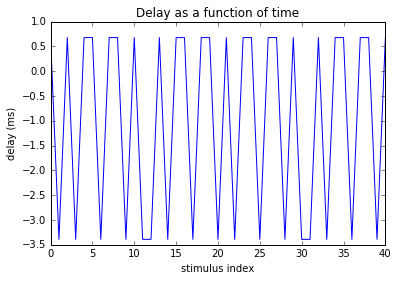

In [18]:
plt.plot(delays)
plt.ylabel('delay (ms)')
plt.xlabel('stimulus index')
plt.title('Delay as a function of time')